In [1]:
import os
from glob import glob
import re

from collections import namedtuple

import time
from datetime import datetime, timedelta

import matplotlib.pyplot as plt

import numpy as np

import itertools

import face_recognition

import cv2

from matplotlib import patches

In [2]:
import matplotlib
import matplotlib.pyplot as plt

import io
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf

from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder

%matplotlib inline

In [23]:
# @title Choose the model to use, then evaluate the cell.
MODELS = {'centernet_with_keypoints': 'centernet_hg104_512x512_kpts_coco17_tpu-32', 
          'centernet_without_keypoints': 'centernet_hg104_512x512_coco17_tpu-8',
          'center_resnet': 'centernet_resnet101_v1_fpn_512x512_coco17_tpu-8'}

# model_display_name = 'centernet_with_keypoints' # @param ['centernet_with_keypoints', 'centernet_without_keypoints']
model_display_name = 'center_resnet' # @param ['centernet_with_keypoints', 'centernet_without_keypoints']
model_name = MODELS[model_display_name]

In [28]:
# pipeline_config = os.path.join('../models/research/object_detection/configs/tf2/',
#                                 model_name + '.config')

# model_dir = '../models/research/object_detection/test_data/checkpoint/'

# # Load pipeline config and build a detection model
# configs = config_util.get_configs_from_pipeline_file(pipeline_config)
# model_config = configs['model']
# detection_model = model_builder.build(
#       model_config=model_config, is_training=False)

# # Restore checkpoint
# ckpt = tf.compat.v2.train.Checkpoint(
#       model=detection_model)
# ckpt.restore(os.path.join(model_dir, 'ckpt-0')).expect_partial()

# def get_model_detection_function(model):
#     """Get a tf.function for detection."""

#     @tf.function
#     def detect_fn(image):
#         """Detect objects in image."""

#         image, shapes = model.preprocess(image)
#         prediction_dict = model.predict(image, shapes)
#         detections = model.postprocess(prediction_dict, shapes)

#         return detections, prediction_dict, tf.reshape(shapes, [-1])

#     return detect_fn

# detect_fn = get_model_detection_function(detection_model)

In [3]:
log_file_list = sorted(glob('../chats/*.log'))

In [4]:
print(log_file_list)

['../chats/551240626.log', '../chats/551734269.log', '../chats/552238357.log', '../chats/559066430.log', '../chats/562675179.log', '../chats/564796691.log', '../chats/582902383.log', '../chats/583815634.log', '../chats/759209688.log']


In [5]:
log_file = log_file_list[-1]

In [6]:
video_file = '../videos/20201003_759209688_Just Chatting.mp4'

In [7]:
Chat = namedtuple('Chat', 'time id text')

In [8]:
t0 = datetime.strptime('00:00:00','%H:%M:%S')

In [9]:
chat_history = list()

with open(log_file, 'r') as file:
    
    count = 0
    for chat in file:
#     chat = next(file).strip()
#         print(chat.strip())
        chat_time = re.search('\[.*?\]', chat)[0]
        user_id_match = re.search('<.*?>', chat)
        user_id = user_id_match[0]
        start_of_chat = user_id_match.span()[-1]
        text = chat[start_of_chat:].strip()
        
        dt = datetime.strptime(chat_time,'[%H:%M:%S]') - t0
#         print(dt.total_seconds())
        
        chat_tuple = Chat(dt.total_seconds(), user_id[1:-1], text)

#         print('{}'.format(chat_tuple))
        chat_history.append(chat_tuple)
        

In [10]:
chat_time_list = [getattr(chat, 'time') for chat in chat_history]

In [11]:
max_min = np.int(np.ceil(max(chat_time_list)/60) + 1)

In [12]:
def express_bins_as_time_range(bins, index_list):
    
    time_range_list = list()
    
    for index in index_list:
        begin = timedelta(seconds=int(bins[index]))
        end = timedelta(seconds=int(bins[index+1]))
        print('[{} ~ {}]'.format(begin, end))
        time_range_list.append((begin, end))
        
    return time_range_list
    

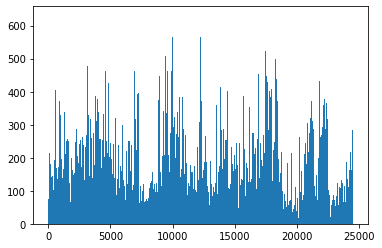

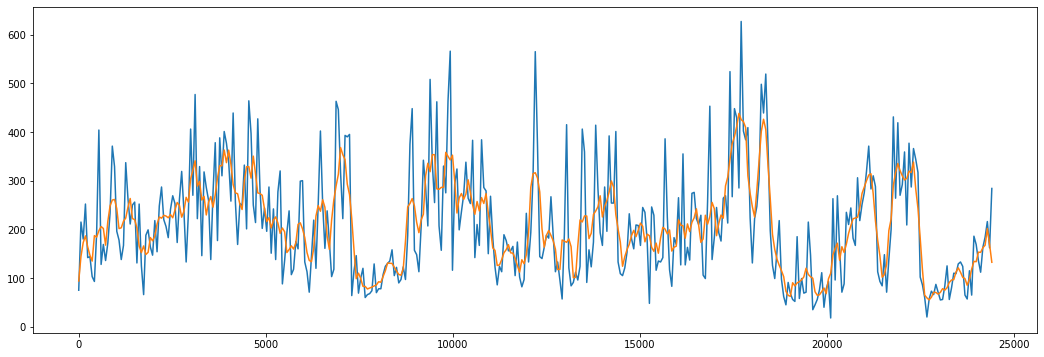

0.5354523227383757
74.39291274610233
[204, 218, 282]
[3:23:21 ~ 3:24:20]
[3:37:18 ~ 3:38:18]
[4:41:05 ~ 4:42:05]


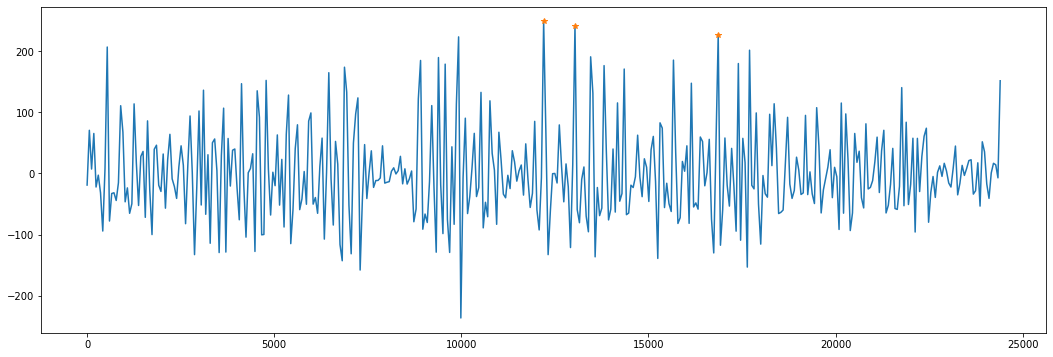

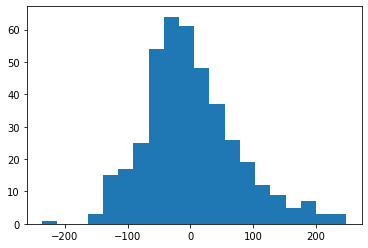

In [13]:
plt.figure()
histogram, bins, _ = plt.hist(chat_time_list, bins=max_min)
plt.show()

plt.figure(figsize=(18, 6))
plt.plot(bins[:-1], histogram)
historgram_avg = np.convolve(histogram, np.ones(5)/5, 'same')
plt.plot(bins[:-1], historgram_avg)
plt.show()

histogram_delta = histogram - historgram_avg

print(np.mean(histogram_delta))

print(np.std(histogram_delta))

outlier_idx = np.argwhere(histogram_delta > np.mean(histogram_delta) + 3 * np.std(histogram_delta))
outlier_idx = list(itertools.chain.from_iterable(outlier_idx))

print(outlier_idx)
express_bins_as_time_range(bins, outlier_idx)

plt.figure(figsize=(18, 6))
plt.plot(bins[:-1], histogram_delta)
plt.plot(bins[:-1][outlier_idx], histogram_delta[outlier_idx], '*')
plt.show()



plt.figure()
_, _, _ = plt.hist(histogram_delta, bins=20)
plt.show()

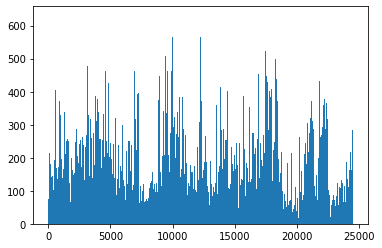

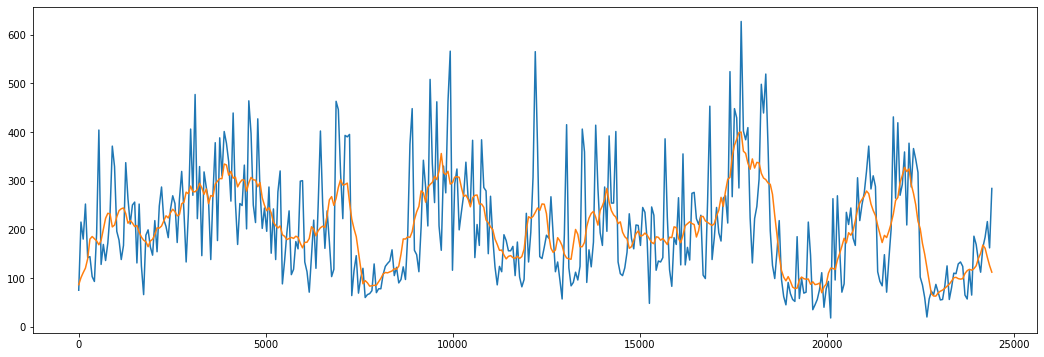

1.174572127139351
86.7866985226702
[166, 204, 218]
[2:45:28 ~ 2:46:28]
[3:23:21 ~ 3:24:20]
[3:37:18 ~ 3:38:18]


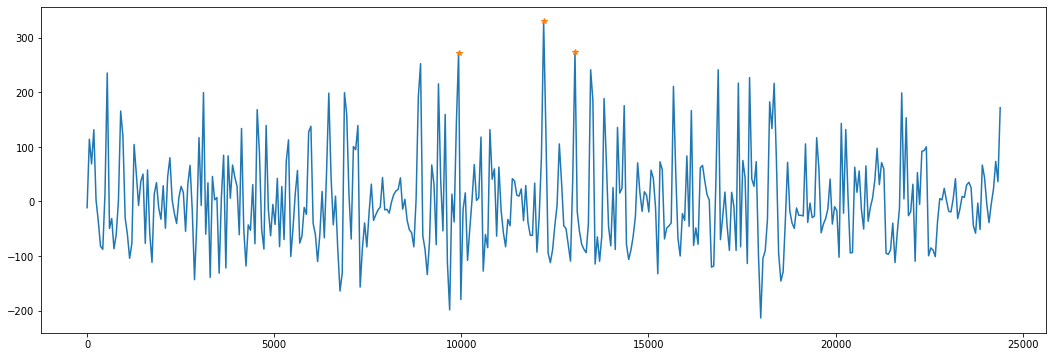

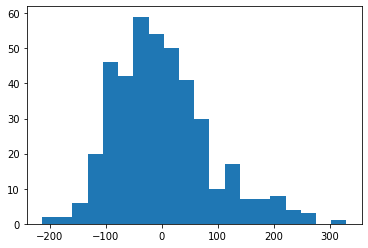

In [14]:
plt.figure()
histogram, bins, _ = plt.hist(chat_time_list, bins=max_min)
plt.show()

plt.figure(figsize=(18, 6))
plt.plot(bins[:-1], histogram)
historgram_avg = np.convolve(histogram, np.ones(10)/10, 'same')
plt.plot(bins[:-1], historgram_avg)
plt.show()

histogram_delta = histogram - historgram_avg

print(np.mean(histogram_delta))

print(np.std(histogram_delta))

outlier_idx = np.argwhere(histogram_delta > np.mean(histogram_delta) + 3 * np.std(histogram_delta))
outlier_idx = list(itertools.chain.from_iterable(outlier_idx))

print(outlier_idx)
express_bins_as_time_range(bins, outlier_idx)

plt.figure(figsize=(18, 6))
plt.plot(bins[:-1], histogram_delta)
plt.plot(bins[:-1][outlier_idx], histogram_delta[outlier_idx], '*')
plt.show()



plt.figure()
_, _, _ = plt.hist(histogram_delta, bins=20)
plt.show()

In [15]:
print(datetime.now().strftime("%H-%M-%S"))

00-48-33


Exception ignored in: <function WeakValueDictionary.__init__.<locals>.remove at 0x7ff74b7b6830>
Traceback (most recent call last):
  File "/Users/joowhan/opt/anaconda3/envs/twitch_env/lib/python3.7/weakref.py", line 109, in remove
    def remove(wr, selfref=ref(self), _atomic_removal=_remove_dead_weakref):
KeyboardInterrupt


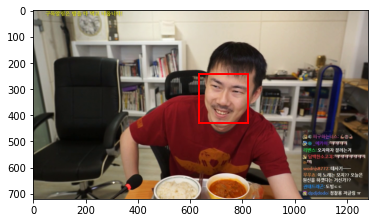

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/joowhan/opt/anaconda3/envs/twitch_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-16-6427542482a5>", line 12, in <module>
    ret, frame = cap.read()
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/joowhan/opt/anaconda3/envs/twitch_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/joowhan/opt/anaconda3/envs/twitch_env/lib/python3.7/site-packages/IPython/core/ultratb.py", line 1148, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_c

KeyboardInterrupt: 

In [16]:
cap = cv2.VideoCapture(video_file)

if (cap.isOpened()== False): 
    print("Error opening video stream or file")

frame_count = 0

while(cap.isOpened()):
    
    
    for i in range(6000):
        ret, frame = cap.read()
    
    if ret == True:

        faces = face_locations = face_recognition.face_locations(frame)
    
        if len(faces) > 0:
            fig, ax = plt.subplots(figsize=(6, 4))
            
            frame = np.stack((frame[:, :, 2], frame[:, :, 1], frame[:, :, 0]), axis=2)
            
            ax.imshow(frame)

            for x1, y1, x2, y2 in face_locations:
                rect = patches.Rectangle((y1, x1), y2 - y1, x2 - x1, edgecolor='r', facecolor="none", linewidth=2)
                ax.add_patch(rect)

            plt.show()

        # Press Q on keyboard to  exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

    else: 
        break

cap.release()

cv2.destroyAllWindows()